# AI AUDITING

## What to audit?

Steps to consider:

- You should first clarify what you want to check (Realiability: KPIs for regression such as RSME,MAE, for classification such as ROC,AUC, F1 Score. Efficiency: training time, inference time, latency, model size, GPU/TPU memory usage, performance and robustness).
- Review data quality and source of confidence.
- Understanding the decisions that AI makes
- Use of tools to understand and explain results
- Measuring AI performance against quality metrics (mathematics) and key performance indicators (business and money).
- How it works over time

## How to audit AI?

AI auditing includes a variety of techniques, such as data and algorithm analysis, testing, documentation review and stakeholder interviews.
It can be divided into 5 practical steps:

- Data analysis: Data analysis includes the examination of training and test data for biases that may lead to unfair results.
- Algorithmic analysis: Algorithmic analysis involves looking for weaknesses or biases in algorithms and decision-making processes.
- Testing: Performing tests that evaluate the performance of the system under various circumstances, uncovering security and performance flaws.
- Documentation: When reviewing documentation, look for inconsistencies that may cause difficulties. Review design and monitoring processes for efficiency and alignment.
- Stakeholders: Interviewing stakeholders allows you to get feedback from those involved in the development and implementation of the IA and to uncover potential difficulties.

#### Dataset de Kaggle

 "https://www.kaggle.com/datasets/danofer/compass/data"

### Tools

This notebook is self-contained, but it requires some python libraries. To install them, simply run the following line:

In [ ]:
# Install a pip package in the current Jupyter kernel.
#import sys
#import site
#usersite = site.getusersitepackages()
#if usersite not in sys.path:
#    sys.path.append(usersite)
#!{sys.executable} -m pip install --user -r requirements.txt

# Data and Task Setup

### Explainability

- Data Collection

#### Load Data
According to the literature, one of the essential parts of the algorithm audit is to know how the data has been collected, the sources and reliability of the data. Through this first step, we can know the explainability through the collection process and robustness through the accuracy of the data. One way to know this can be done in a simple way. By means of a check list we try to get clarity and to know the level of accessibility of the data.

### CHECKLIST

- Is the source of the data known?  YES_ NO_
- Do you know the process of data collection, if yes, please justify? YES_ NO_ Justify __
- Are the data labelled? YES_ NO_ 
- Are the data accurate? YES_ NO_

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import gc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
df = pd.read_csv('cox-violent-parsed.csv')
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0
3,4.0,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,0,3,0,0,0,-1.0,26/01/2013 3:45,05/02/2013 5:36,13001275CF10A,26/01/2013,NaN,1.0,(F3),Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,05/07/2013,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),05/07/2013,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,26/01/2013,05/02/2013,0,9,159,1
4,5.0,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,0,4,0,1,4,-1.0,13/04/2013 4:58,14/04/2013 7:02,13005330CF10A,13/04/2013,NaN,1.0,(F3),Possession of Cocaine,1,13011511MM10A,(M1),0.0,16/06/2013,Driving Under The Influence,16/06/2013,16/06/2013,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,16/06/2013,16/06/2013,4,0,63,0


### Data preprocessing

In [ ]:
# We code the gender by 1 Male 0 Female
df["sex"].replace({'Male': 1, 'Female': 0}, inplace=True)

In [ ]:
# remove unneeded column identifiers
df.drop(columns = ['last','first','out_custody','in_custody','c_offense_date','decile_score.1','priors_count.1','c_case_number','days_b_screening_arrest','start','end','event','screening_date','c_case_number','juv_other_count','juv_misd_count','juv_fel_count','r_days_from_arrest','id','r_charge_degree','r_offense_date', 'vr_case_number','r_case_number','r_jail_out','c_arrest_date','r_charge_desc','r_jail_in', 'violent_recid','vr_charge_degree','vr_offense_date','vr_charge_desc'], inplace=True)
df.head()

,name,compas_screening_date,sex,dob,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,type_of_assessment,score_text,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date
0,miguel hernandez,14/08/2013,1,18/04/1947,69,Greater than 45,Other,1,0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,14/08/2013
1,miguel hernandez,14/08/2013,1,18/04/1947,69,Greater than 45,Other,1,0,13/08/2013 6:03,14/08/2013 5:41,1.0,(F3),Aggravated Assault w/Firearm,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,14/08/2013
2,michael ryan,31/12/2014,1,06/02/1985,31,25 - 45,Caucasian,5,0,NaN,NaN,NaN,NaN,NaN,-1,0,Risk of Recidivism,Medium,Risk of Violence,2,Low,31/12/2014
3,kevon dixon,27/01/2013,1,22/01/1982,34,25 - 45,African-American,3,0,26/01/2013 3:45,05/02/2013 5:36,1.0,(F3),Felony Battery w/Prior Convict,1,1,Risk of Recidivism,Low,Risk of Violence,1,Low,27/01/2013
4,ed philo,14/04/2013,1,14/05/1991,24,Less than 25,African-American,4,4,13/04/2013 4:58,14/04/2013 7:02,1.0,(F3),Possession of Cocaine,1,0,Risk of Recidivism,Low,Risk of Violence,3,Low,14/04/2013


In [ ]:
#We need to convert variables to date and count days in prison.
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
df['days_in_jail'] = abs((df['c_jail_out'] - df['c_jail_in']).dt.days)

In [ ]:
#The data type is checked again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18316 non-null  object        
 1   compas_screening_date  18316 non-null  object        
 2   sex                    18316 non-null  int64         
 3   dob                    18316 non-null  object        
 4   age                    18316 non-null  int64         
 5   age_cat                18316 non-null  object        
 6   race                   18316 non-null  object        
 7   decile_score           18316 non-null  int64         
 8   priors_count           18316 non-null  int64         
 9   c_jail_in              17019 non-null  datetime64[ns]
 10  c_jail_out             17019 non-null  datetime64[ns]
 11  c_days_from_compas     17449 non-null  float64       
 12  c_charge_degree        17449 non-null  object        
 13  c

In [ ]:
#Check the number of unique values of all character object data types
df.select_dtypes(include='object').nunique()

name                     10855
compas_screening_date      703
dob                       7485
age_cat                      3
race                         6
c_charge_degree             14
c_charge_desc              513
type_of_assessment           1
score_text                   3
v_type_of_assessment         1
v_score_text                 3
v_screening_date           703
dtype: int64

### EDA

In [11]:
jail_vars = df.select_dtypes(include='object').columns.tolist()

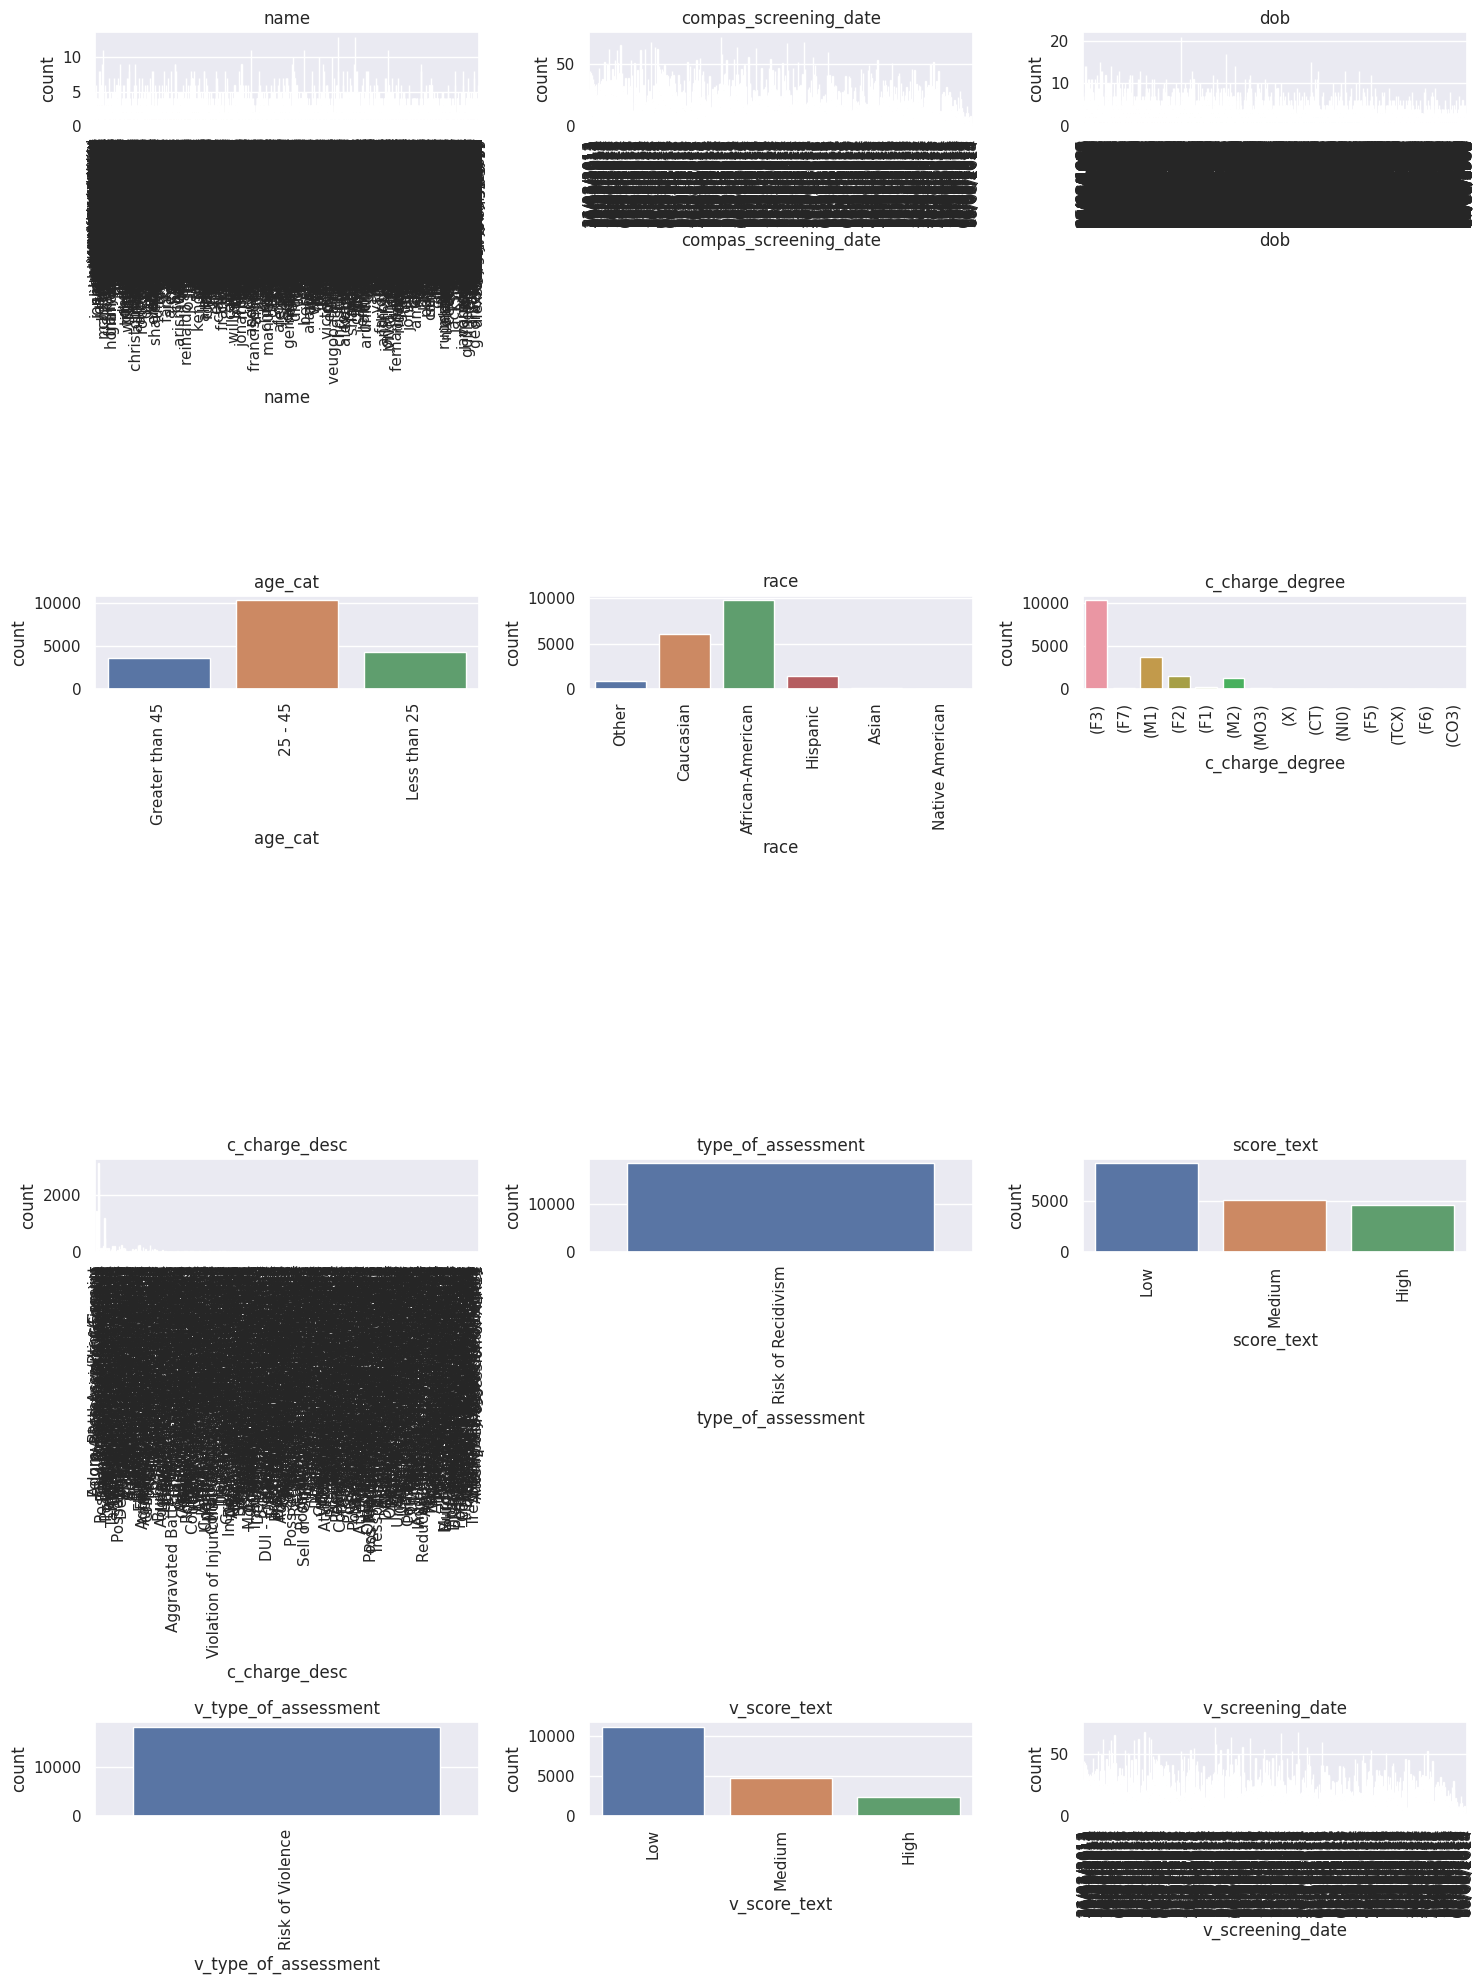

In [ ]:
# Create subplots
num_cols = len(jail_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(jail_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# adjust spaces
fig.tight_layout()

plt.show()

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,18316.0,0.815298,0.388066,0.0,1.0,1.0,1.0,1.0
age,18316.0,34.019273,11.667811,18.0,25.0,31.0,41.0,96.0
decile_score,18316.0,4.997052,2.937569,-1.0,2.0,5.0,8.0,10.0
priors_count,18316.0,3.913191,5.299864,0.0,0.0,2.0,5.0,43.0
c_days_from_compas,18316.0,57.694596,310.376791,0.0,1.0,1.0,5.0,9485.0
is_recid,18316.0,0.414774,0.576449,-1.0,0.0,0.0,1.0,1.0
is_violent_recid,18316.0,0.073105,0.260317,0.0,0.0,0.0,0.0,1.0
v_decile_score,18316.0,4.022822,2.614189,-1.0,2.0,4.0,6.0,10.0
days_in_jail,18316.0,59.698278,89.039456,0.0,1.0,30.0,62.0,1977.0


In [43]:
df.isna().sum()

name                        0
compas_screening_date       0
sex                         0
dob                         0
age                         0
age_cat                     0
race                        0
decile_score                0
priors_count                0
c_jail_in                1297
c_jail_out               1297
c_days_from_compas          0
c_charge_degree           867
c_charge_desc             881
is_recid                    0
is_violent_recid            0
type_of_assessment          0
score_text                 23
v_type_of_assessment        0
v_decile_score              0
v_score_text                6
v_screening_date            0
days_in_jail                0
dtype: int64

In [44]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

c_jail_in          7.081240
c_jail_out         7.081240
c_charge_desc      4.810002
c_charge_degree    4.733566
score_text         0.125573
v_score_text       0.032758
dtype: float64

In [45]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18316 non-null  object        
 1   compas_screening_date  18316 non-null  object        
 2   sex                    18316 non-null  int64         
 3   dob                    18316 non-null  object        
 4   age                    18316 non-null  int64         
 5   age_cat                18316 non-null  object        
 6   race                   18316 non-null  object        
 7   decile_score           18316 non-null  int64         
 8   priors_count           18316 non-null  int64         
 9   c_jail_in              17019 non-null  datetime64[ns]
 10  c_jail_out             17019 non-null  datetime64[ns]
 11  c_days_from_compas     18316 non-null  float64       
 12  c_charge_degree        17449 non-null  object        
 13  c

In [46]:
df.describe(include=["object","category"]).T

,count,unique,top,freq
name,18316,10855,brandon ross,13
compas_screening_date,18316,703,20/03/2013,72
dob,18316,7485,21/11/1991,21
age_cat,18316,3,25 - 45,10372
race,18316,6,African-American,9791
c_charge_degree,17449,14,(F3),10294
c_charge_desc,17435,513,arrest case no charge,3085
type_of_assessment,18316,1,Risk of Recidivism,18316
score_text,18293,3,Low,8597
v_type_of_assessment,18316,1,Risk of Violence,18316


<Axes: >

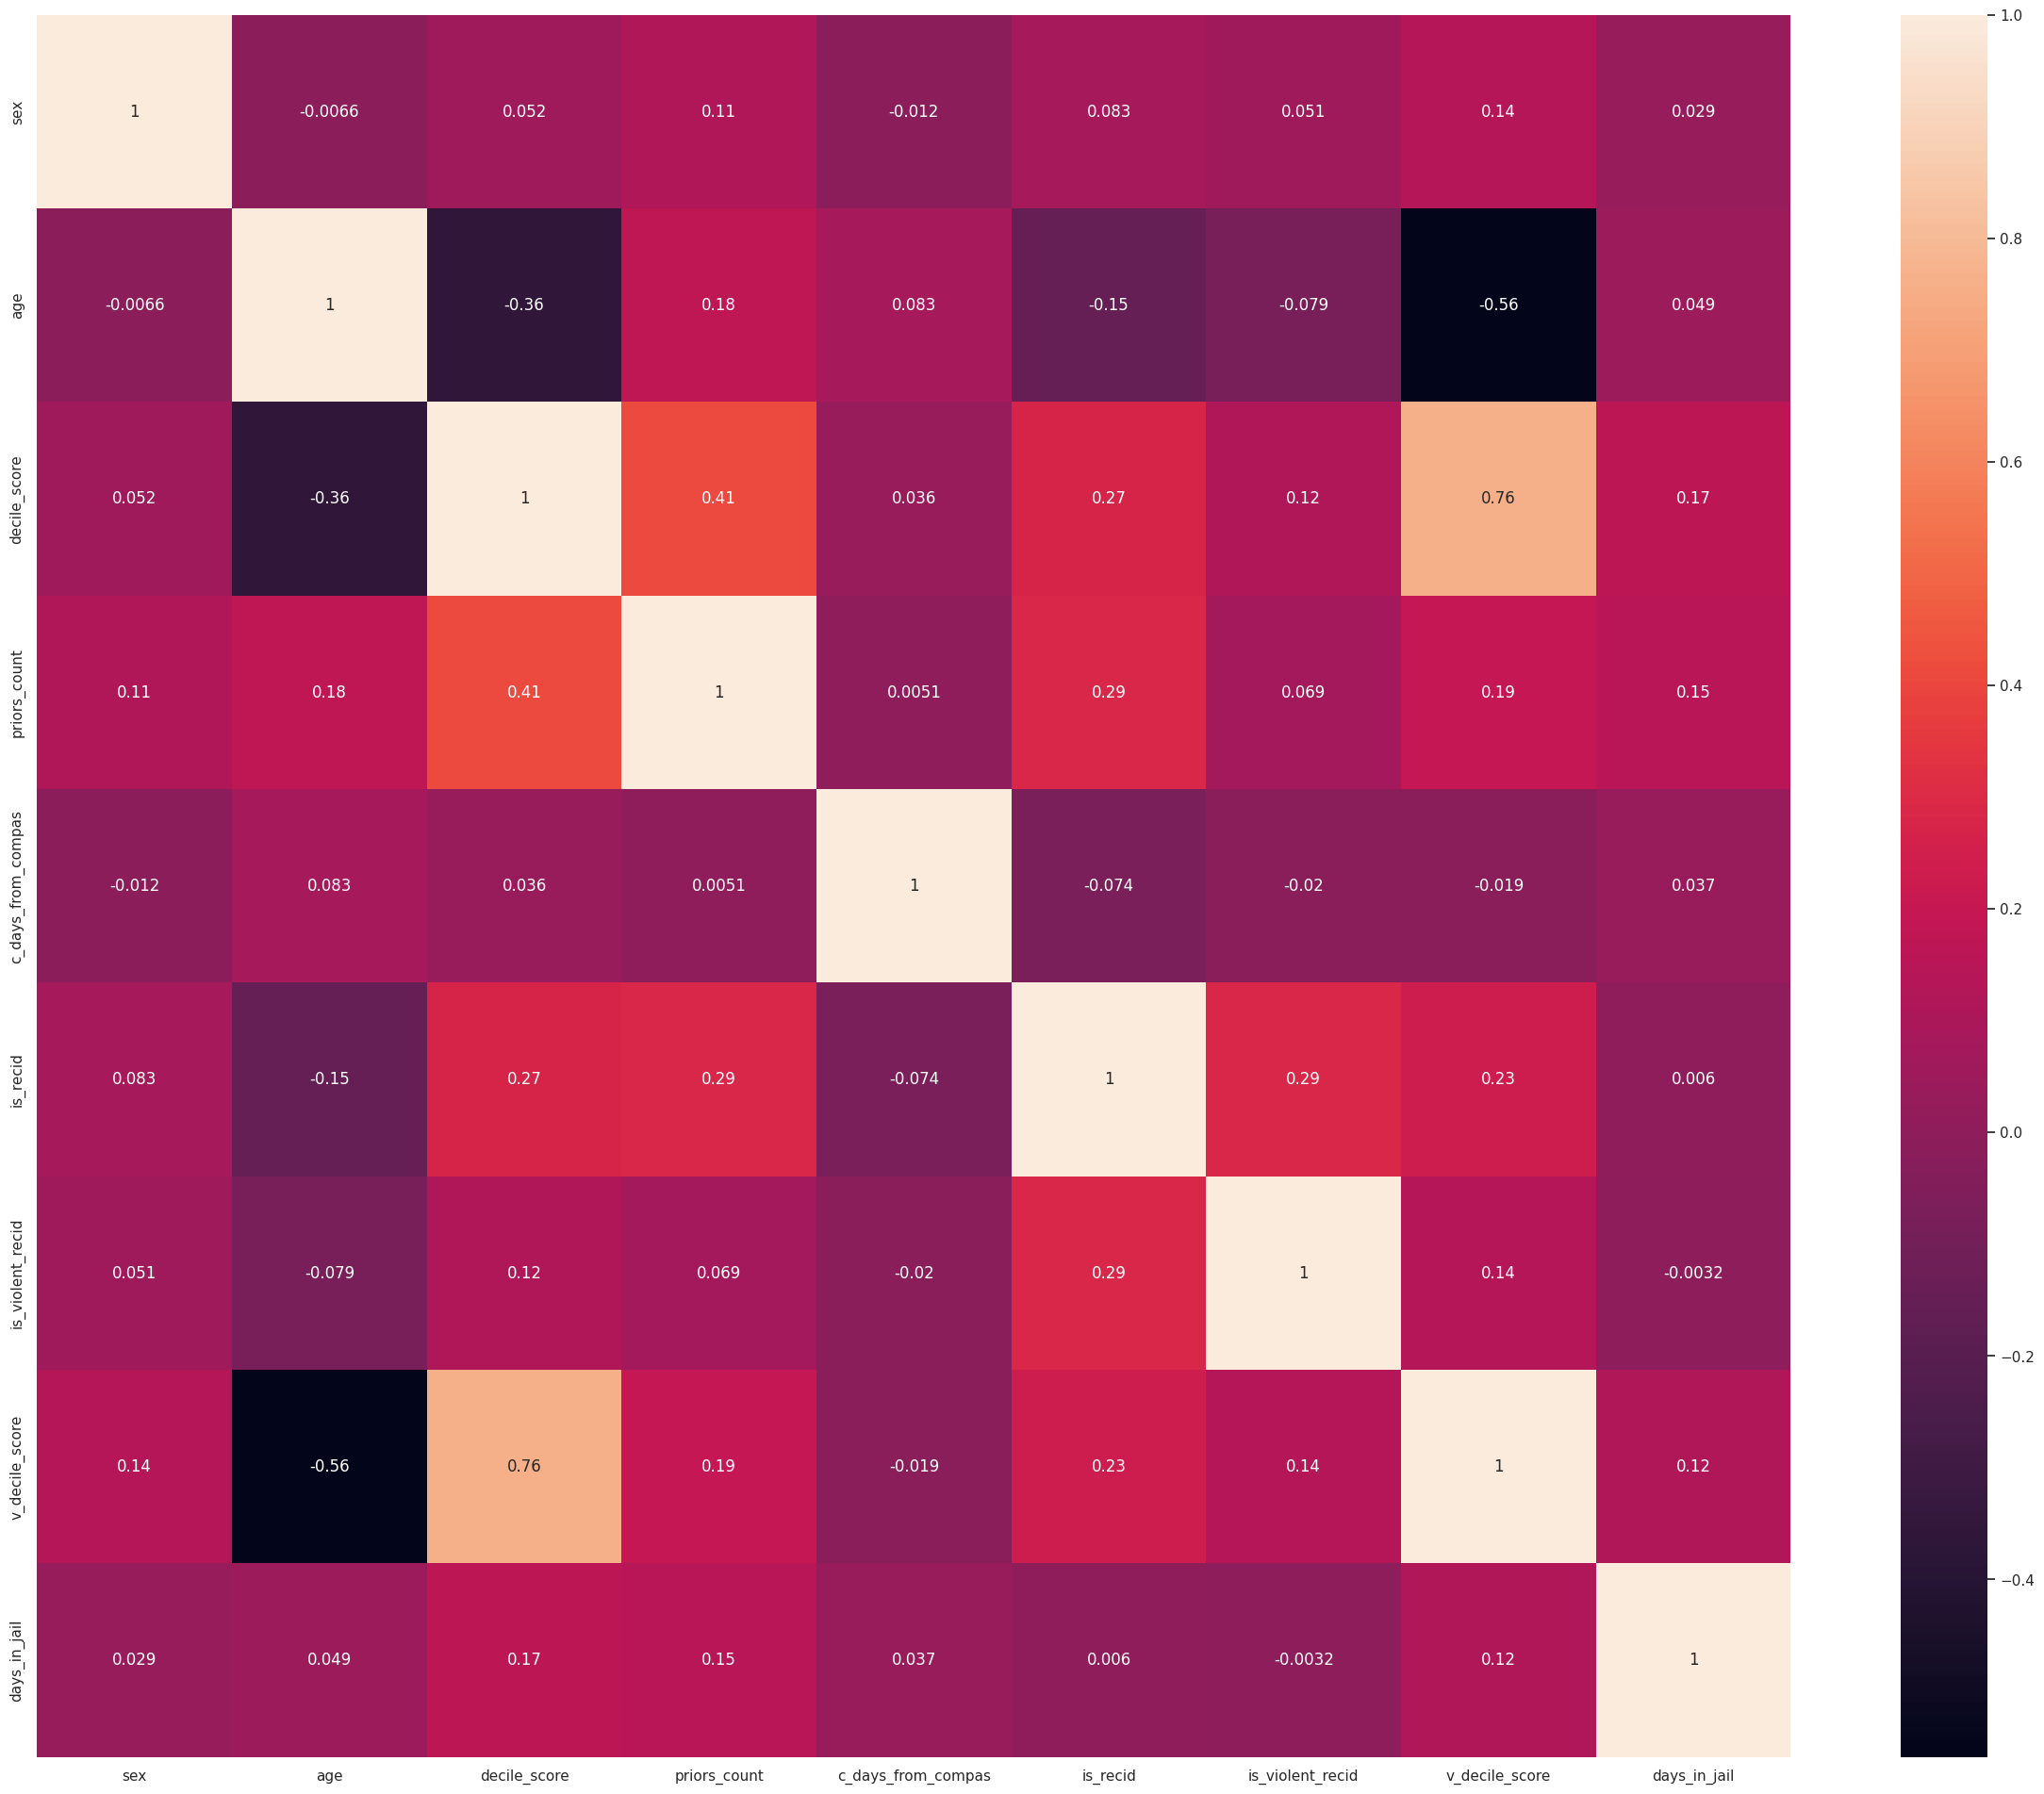

In [47]:
plt.figure(figsize=(30, 24))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

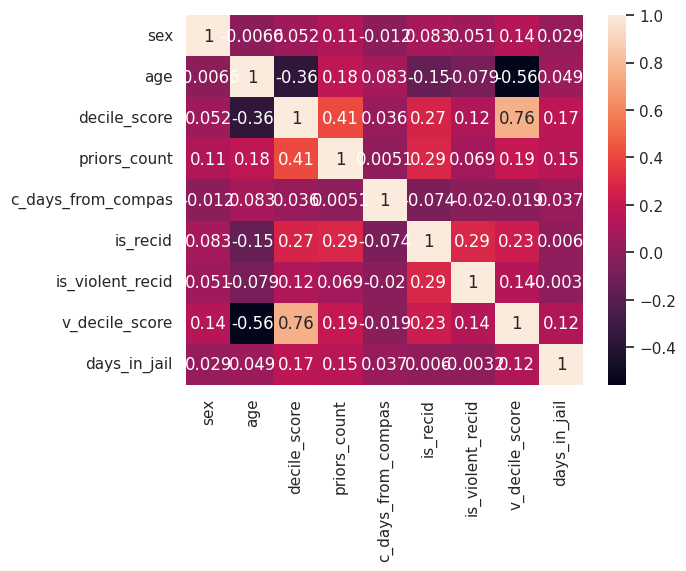

In [48]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

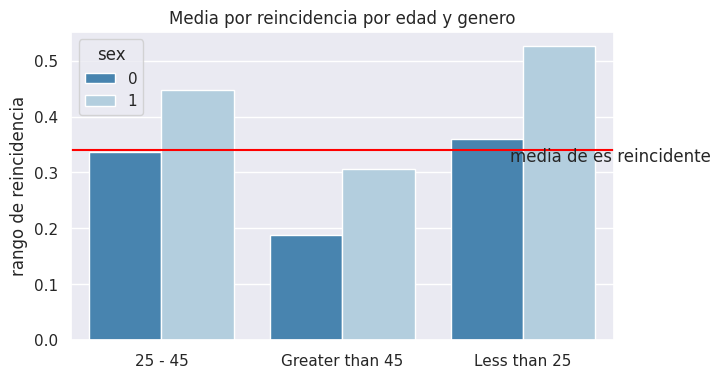

In [66]:
df2 = df.groupby(["sex","age_cat"])["is_recid"].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=df2,x="age_cat",y="is_recid",hue="sex",palette="Blues_r")
plt.title("Media por reincidencia por edad y genero")
plt.xlabel("")
plt.ylabel("rango de reincidencia")
plt.axhline(y=0.34,color="red")
plt.text(x=1.93,y=0.32,s="media de es reincidente")

plt.show(block=False)

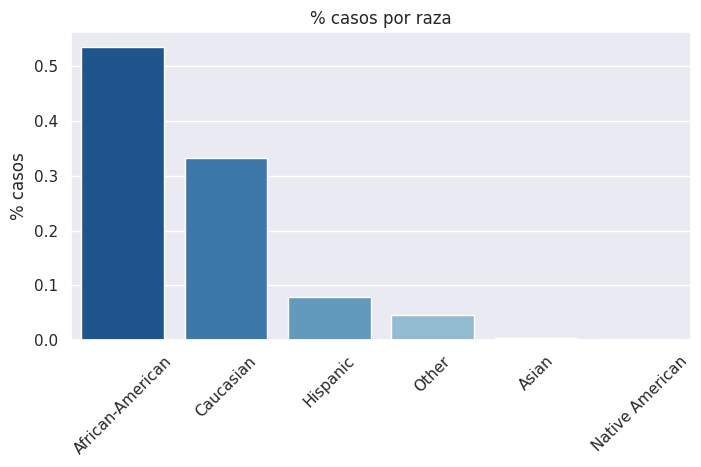

In [50]:
df3 = df["race"].value_counts(normalize=True,ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x=df3["index"],y=df3["race"],palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("% casos")
plt.title("% casos por raza")
plt.show(block=False)

### MODEL TRAINING

In [63]:
df.head()

,name,compas_screening_date,sex,dob,age,age_cat,race,decile_score,priors_count,c_jail_in,c_jail_out,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,is_violent_recid,type_of_assessment,score_text,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,days_in_jail
0,miguel hernandez,14/08/2013,1,18/04/1947,69,Greater than 45,Other,1,0,2013-08-13 06:03:00,2013-08-14 05:41:00,1.000000,(F3),Aggravated Assault w/Firearm,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,14/08/2013,0.000000
1,miguel hernandez,14/08/2013,1,18/04/1947,69,Greater than 45,Other,1,0,2013-08-13 06:03:00,2013-08-14 05:41:00,1.000000,(F3),Aggravated Assault w/Firearm,0,0,Risk of Recidivism,Low,Risk of Violence,1,Low,14/08/2013,0.000000
2,michael ryan,31/12/2014,1,06/02/1985,31,25 - 45,Caucasian,5,0,NaT,NaT,57.694596,NaN,NaN,-1,0,Risk of Recidivism,Medium,Risk of Violence,2,Low,31/12/2014,59.698278
3,kevon dixon,27/01/2013,1,22/01/1982,34,25 - 45,African-American,3,0,2013-01-26 03:45:00,2013-05-02 05:36:00,1.000000,(F3),Felony Battery w/Prior Convict,1,1,Risk of Recidivism,Low,Risk of Violence,1,Low,27/01/2013,96.000000
4,ed philo,14/04/2013,1,14/05/1991,24,Less than 25,African-American,4,4,2013-04-13 04:58:00,2013-04-14 07:02:00,1.000000,(F3),Possession of Cocaine,1,0,Risk of Recidivism,Low,Risk of Violence,3,Low,14/04/2013,1.000000


In [69]:
X = df.drop(['is_recid', 'name', 'c_jail_in','c_jail_out','compas_screening_date','age_cat','dob','c_charge_desc','c_charge_degree','type_of_assessment','score_text','v_type_of_assessment','v_score_text','v_screening_date','race'], axis=1)
y = df['is_recid']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

### Decision tress

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Accuracy: 0.8793668122270742
Classification report:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       149
           0       0.91      0.84      0.87      1785
           1       0.85      0.91      0.88      1730

    accuracy                           0.88      3664
   macro avg       0.91      0.91      0.91      3664
weighted avg       0.88      0.88      0.88      3664



### Propose a better parameters with gridsearch

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}


In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=1, min_samples_split=3, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=3, random_state=42)

In [77]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 70.91 %


In [84]:
# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Accuracy: 0.709061135371179
Classification report:
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       149
           0       0.69      0.75      0.72      1785
           1       0.71      0.64      0.68      1730

    accuracy                           0.71      3664
   macro avg       0.78      0.80      0.78      3664
weighted avg       0.71      0.71      0.71      3664



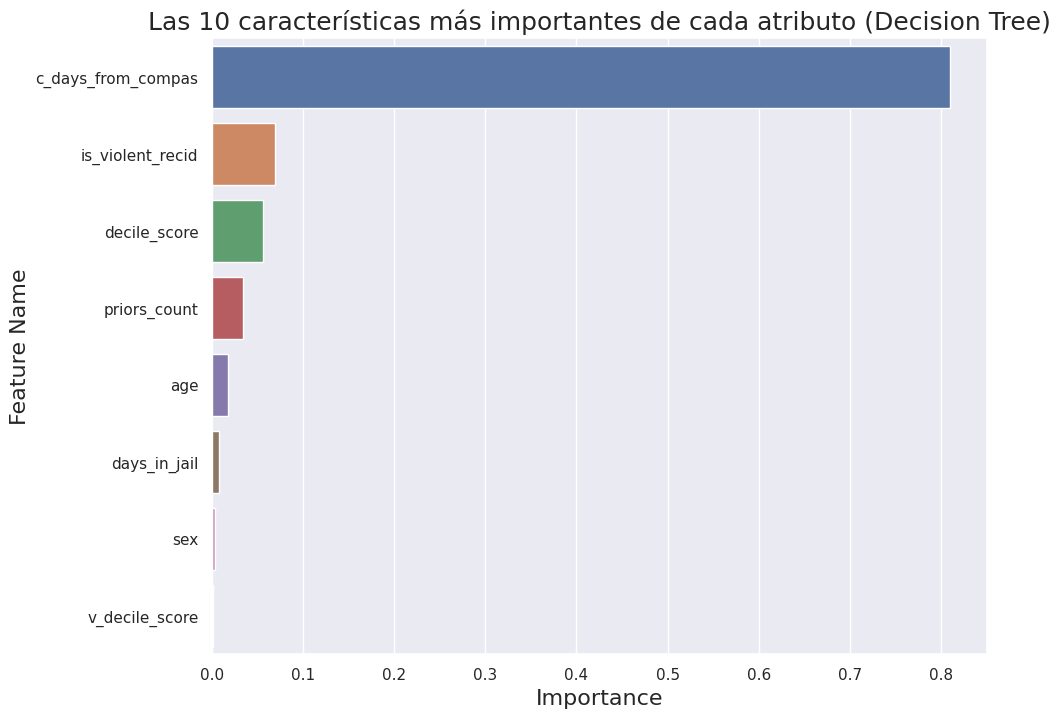

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

## Explainability The Model With Shap

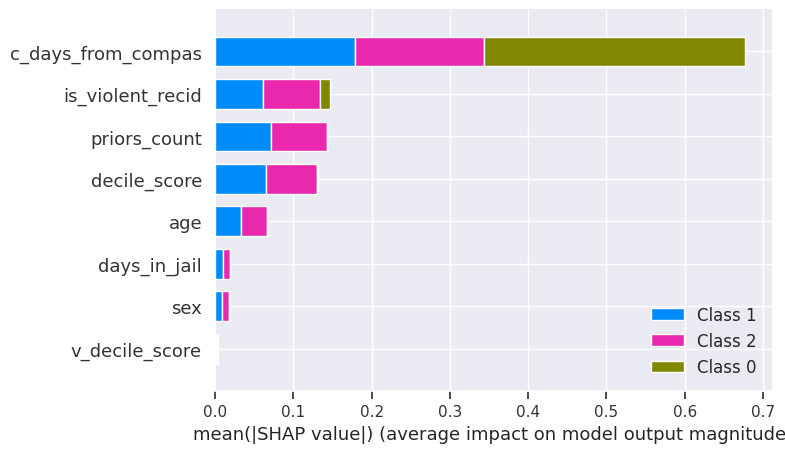

In [91]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

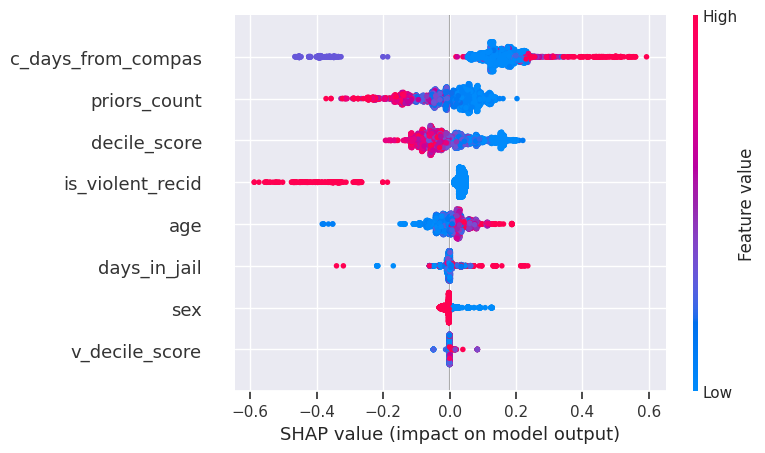

In [92]:
# computar SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.709061135371179')

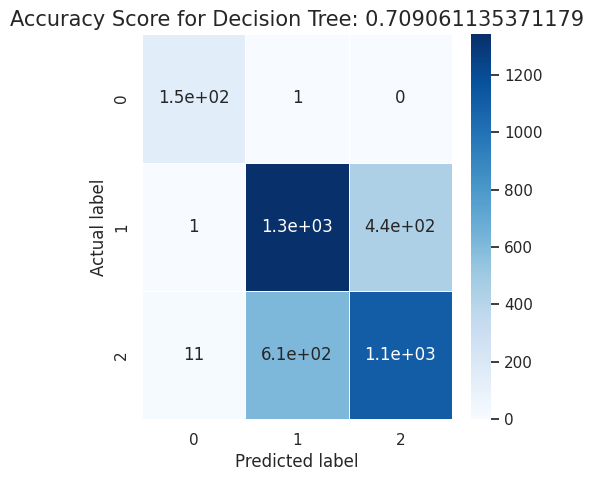

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

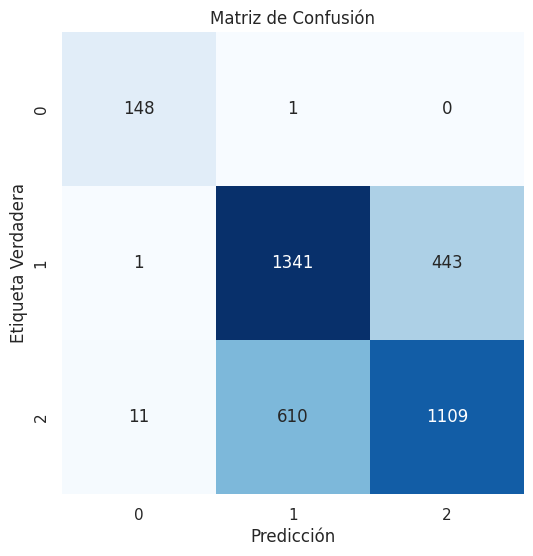

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

plt.show()


### Explain the Model With Lime

In [126]:
import lime
import lime.lime_tabular

In [141]:
# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['sex'], verbose=True, mode='regression')

### Build a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the model
model1 = LogisticRegression()

# Train the model
model1.fit(X_train, y_train)

# Predict
y_pred = model1.predict(X_test)

# Calculate the metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")


Precisión: 0.6487445414847162


In [143]:
j = 5
exp = explainer.explain_instance(X_test.values[j], model1.predict, num_features=6)

Intercept 0.3715589348542863
Prediction_local [0.89957978]
Right: 1


In [144]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [145]:
exp.as_list()

[('priors_count > 5.00', 0.6672724936443802),
 ('decile_score > 8.00', 0.28935779399925354),
 ('c_days_from_compas > 6.00', -0.2108169394249829),
 ('is_violent_recid <= 0.00', -0.19057438251185924),
 ('v_decile_score > 6.00', -0.10283061132130321),
 ('25.00 < age <= 31.00', 0.07561248754041693)]

The predicted value was 1, in this case the answer is " Man "

### Saving the model

In [ ]:
import pickle

In [ ]:
output_file = 'model.bin'
output_file

In [ ]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dtree, model), f_out)